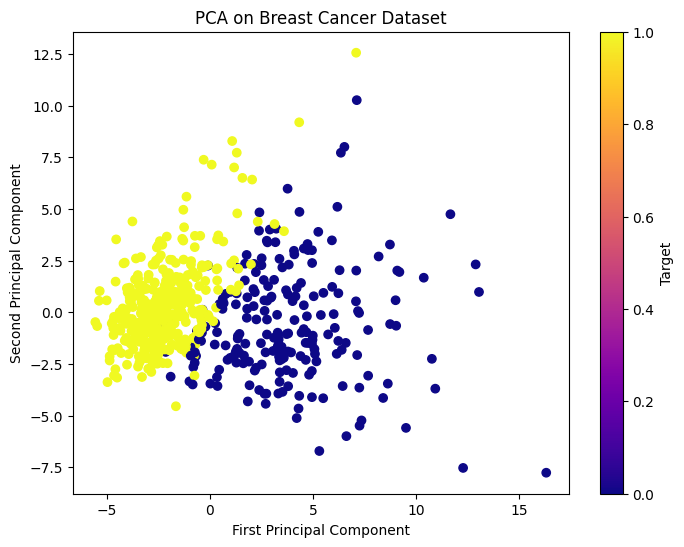

Predicted values:
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0]


c:\Users\ravi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


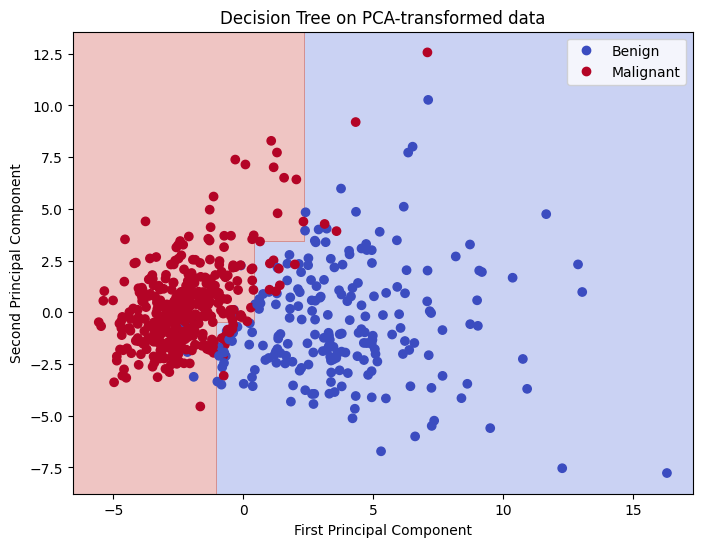


 Confusion Matrix:  [[ 62   1]
 [  7 101]]

 Accuracy :  95.32163742690058

 Report :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        63
           1       0.99      0.94      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171



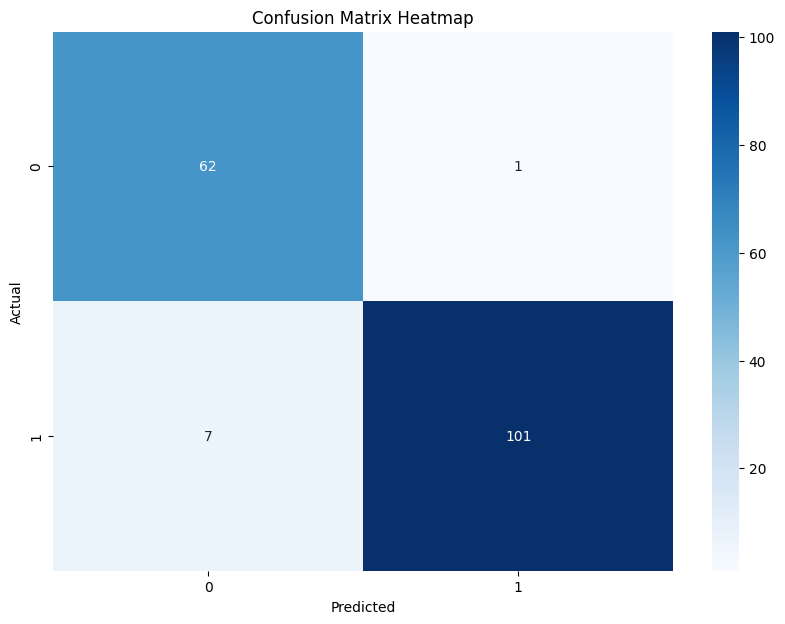

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer dataset
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame

# Input features
X = df[cancer['feature_names']]
# Target values
y = df['target']

# Standardize the features
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

# Apply PCA
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

# Create a DataFrame for the PCA-transformed data
df_pca1 = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca1['target'] = y

# Optionally, to better visualize the results:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA on Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca1[['PC1', 'PC2']], y, test_size=0.3, random_state=42)

#TRAINING USING GINI INDEX
def train_using_gini(X_train, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

# Function to make predictions using the trained classifier
def prediction(X_test, clf_object):
    # Prediction on test set
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Train the classifier
clf_gini = train_using_gini(X_train, y_train)

# Make predictions
y_pred = prediction(X_test, clf_gini)


# Calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix: ",cm)
    print("\n Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("\n Report :\n",classification_report(y_test, y_pred))

    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
x_min, x_max = df_pca1['PC1'].min() - 1, df_pca1['PC1'].max() + 1
y_min, y_max = df_pca1['PC2'].min() - 1, df_pca1['PC2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf_gini.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of the PCA-transformed data
scatter = plt.scatter(df_pca1['PC1'], df_pca1['PC2'], c=df_pca1['target'], cmap='coolwarm')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Decision Tree on PCA-transformed data')
plt.legend(handles=scatter.legend_elements()[0], labels=['Benign', 'Malignant'])
plt.show()


# Calculate and print accuracy
cal_accuracy(y_test, y_pred)
